#Machine Learning Project Workflow

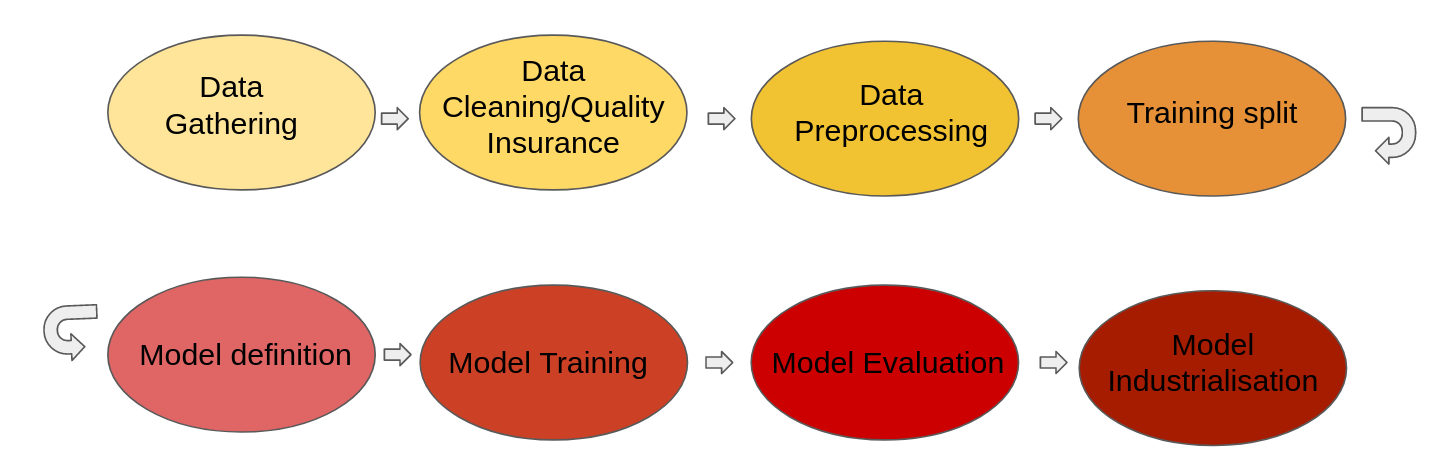

Why is data preprocessing I/O so important ?? 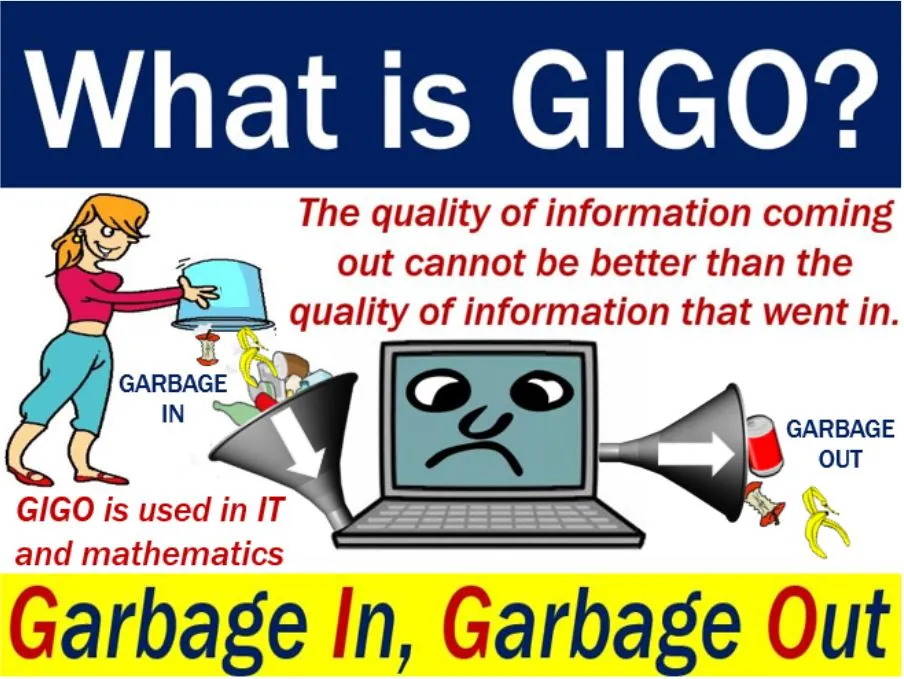

#DICOM : Digital Imaging and Communications in Medicine


 - Returned by the Imaging scanner
 - Used for all types of images (CT, MRI, X-Rays .. ) and more (RTSTRUCT files)
 - Classifies information into tags
 - Can hold may types of data



The images are feely available from the Cancer Image Archive at : https://nbia.cancerimagingarchive.net/nbia-search/?MinNumberOfStudiesCriteria=1&CollectionCriteria=Pediatric-CT-SEG.

I have used the nbia software to download them.


In [1]:
import os
import shutil
project_dir = 'Intro_to_image_processing'
%cd /content
if os.path.exists(project_dir):
  shutil.rmtree(project_dir)
else : 
  os.mkdir(project_dir)
!git clone https://github.com/McMedHacks/Intro_to_image_processing.git
%cd Intro_to_image_processing

/content
Cloning into 'Intro_to_image_processing'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 43 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (43/43), done.
/content/Intro_to_image_processing


There exists many DICOM external softwares/viewers like [3D Slicer](https://www.slicer.org/) for instance but they might only work on a certain OS and will require a specific software installation. Considering your Machine Learning pipeline, if you want to keep everything python based [pydicom](https://pydicom.github.io/pydicom/stable/old/pydicom_user_guide.html) is what you want to use.

In [2]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.7 MB/s 


In [3]:
import pydicom
import glob
import numpy as np

In [4]:
list_dcm_path = glob.glob("/content/Intro_to_image_processing/*.dcm")
print("My list contains {} elements. These are the 5 first: ".format(len(list_dcm_path)))
list_dcm_path[:5]

My list contains 36 elements. These are the 5 first: 


['/content/Intro_to_image_processing/1-32.dcm',
 '/content/Intro_to_image_processing/1-24.dcm',
 '/content/Intro_to_image_processing/1-31.dcm',
 '/content/Intro_to_image_processing/1-15.dcm',
 '/content/Intro_to_image_processing/1-25.dcm']

## Opening a DICOM file

In [5]:
my_dcm_file = pydicom.dcmread(list_dcm_path[0])
my_dcm_file


Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7009.2401.166301492124389543006069348500
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19600101'
(0008, 0013) Instance Creation Time              TM: '172129'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Insta

## Pydcom elements

### Dataset
[Dataset](https://pydicom.github.io/pydicom/stable/old/base_element.html#dataset) is the main object you will work with directly. Dataset wraps a dictionary, where the key is the DICOM tag (as a BaseTag object, described below), and the value is the corresponding DataElement instance (also described below). It implements most of the methods of dict, so that it mostly behaves like a wrapped dict. This allows direct access to the data elements via their tags, as shown below.

###DataElement
The [DataElement](https://pydicom.github.io/pydicom/stable/old/base_element.html#dataelement) class is not usually used directly in user code, but is used extensively by Dataset. DataElement is a simple object which stores the following things:

        tag – the element’s tag (as a BaseTag object)

        VR – the element’s Value Representation – a two letter str that describes to the format of the stored value

        VM – the element’s Value Multiplicity as an int. This is automatically determined from the contents of the value.

        value – the element’s actual value. A regular value like a number or string (or list of them if the VM > 1), or a Sequence.



###Tag 
[Tag](https://pydicom.github.io/pydicom/stable/old/base_element.html#tag) is not generally used directly in user code, as BaseTags are automatically created when you assign or read elements using their keywords as illustrated in sections above.

The BaseTag class is derived from int, so in effect, it is just a number with some extra behavior:

        Tag() is used to create instances of BaseTag and enforces that the DICOM tag fits in the expected 4-byte (group,element)

        A BaseTag instance can be created from an int or a tuple containing the (group,element), or from the DICOM keyword:


###Sequence

[Sequence](https://pydicom.github.io/pydicom/stable/old/base_element.html#sequence) is derived from Python’s list. The only added functionality is to make string representations prettier. Otherwise all the usual methods of list like item selection, append, etc. are available.

For examples of accessing data nested in sequences, see Working with sequences.

You have 3 types of python data in a DICOM files : VM Value Multiplicity = size int, VR Value Representaiton str, name, value
tag number return a full DataElement instance,
pydicom.dataelem.DataElement dataset.add()
[pydicom sequence](https://pydicom.github.io/pydicom/stable/reference/generated/pydicom.sequence.Sequence.html#pydicom.sequence.Sequence)

##Getting Metadata by reading tags

In [6]:
from pydicom.tag import Tag

# all of these are equivalent
t1 = Tag(0x00100010) 
t2 = Tag(0x10,0x10)
t3 = Tag((0x10, 0x10))
t4 = Tag("PatientName")
print(t1)
print(type(t1))
print(t1==t2, t1==t3, t1==t4)

(0010, 0010)
<class 'pydicom.tag.BaseTag'>
True True True


In [7]:
print(my_dcm_file[0x10,0x10]) # Returns the whole DataElement
print(my_dcm_file.PatientName) # Returns the value
print(my_dcm_file[0x10,0x10].value) # Returns the value as well

(0010, 0010) Patient's Name                      PN: 'ACRIN-FLT-Breast_001'
ACRIN-FLT-Breast_001
ACRIN-FLT-Breast_001


In [8]:
print("As 'my_dcm_file[0x10,0x10]' is a DataElement, we can look at all its components:")
print("Value Multiplicity : ", my_dcm_file[0x10,0x10].VM)
print("Value Representation : ", my_dcm_file[0x10,0x10].VR)
print("Tag : ", my_dcm_file[0x10,0x10].tag)
print("Value : ", my_dcm_file[0x10,0x10].value)

As 'my_dcm_file[0x10,0x10]' is a DataElement, we can look at all its components:
Value Multiplicity :  1
Value Representation :  PN
Tag :  (0010, 0010)
Value :  ACRIN-FLT-Breast_001


In [9]:
print(type(my_dcm_file[0x10,0x10]))
print("================")
print(my_dcm_file[0x10,0x10])

<class 'pydicom.dataelem.DataElement'>
(0010, 0010) Patient's Name                      PN: 'ACRIN-FLT-Breast_001'


DataElement can contain Sequences.

In [10]:
print(type(my_dcm_file[0x0012, 0x0064]))
print("================")
print(my_dcm_file[0x0012, 0x0064])



<class 'pydicom.dataelem.DataElement'>
(0012, 0064) De-identification Method Code Seque SQ: <Sequence, length 8>


If we take the first element of this sequence we get another dataset

In [11]:


print(type(my_dcm_file[0x0012, 0x0064][0]))
print("================")
print(my_dcm_file[0x0012, 0x0064][0])

<class 'pydicom.dataset.Dataset'>
(0008, 0100) Code Value                          SH: '113100'
(0008, 0102) Coding Scheme Designator            SH: 'DCM'
(0008, 0104) Code Meaning                        LO: 'Basic Application Confidentiality Profile'


###Important tags

In [12]:
print("Storage object:", my_dcm_file.SOPClassUID.name)
print("Image modality :", my_dcm_file.Modality)
print("Image ID :",my_dcm_file.SOPInstanceUID.name)
print("Treatment site :",my_dcm_file.BodyPartExamined)

Storage object: CT Image Storage
Image modality : CT
Image ID : 1.3.6.1.4.1.14519.5.2.1.7009.2401.166301492124389543006069348500
Treatment site : BREAST


In [14]:
print("Image position :",my_dcm_file.ImagePositionPatient)
print("Image height :",my_dcm_file.Rows)                
print("Image width :",my_dcm_file.Columns)                       
print("Image spacings :",my_dcm_file.PixelSpacing)           

Image position : [-250.000000, -250.000000, -200.250000]
Image height : 512
Image width : 512
Image spacings : [0.976562, 0.976562]


You can list the DICOM into a Dcitionnary.

In [15]:
keywords = my_dcm_file.dir()

dic = dict()

for key in keywords:
    dic[key] = my_dcm_file[key]

But then you will have to do it recuersively because of the sequences objects that contain Datasets

In [16]:
print(my_dcm_file[0x0012, 0x0064])

(0012, 0064) De-identification Method Code Seque SQ: <Sequence, length 8>


Printing the list of tags can be a good way of looking for a certain tag.

In [17]:
keywords

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'ClinicalTrialTimePointDescription',
 'ClinicalTrialTimePointID',
 'Columns',
 'ContentDate',
 'ContentTime',
 'ConvolutionKernel',
 'DataCollectionDiameter',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'Exposure',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'InstitutionName',
 'KVP',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'OperatorsName',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PatientPosition',
 'PatientSex',
 'PatientWeight',
 'PhotometricIn

You can look at this [script](https://github.com/pydicom/pydicom/blob/master/pydicom/_dicom_dict.py) to have an idea of the common existing tags. 


###Most interesting thing : The Image

In [1]:
# print(my_dcm_file.PixelData)
# print("================")
# print(type(my_dcm_file.PixelData))
# print("================")
# print(my_dcm_file[0x7fe0, 0x0010])


In [18]:
print(type(my_dcm_file.pixel_array))
print("================")
print(my_dcm_file.pixel_array)
print("================")
print(np.all(my_dcm_file.pixel_array==my_dcm_file[0x7fe0, 0x0010].value))

<class 'numpy.ndarray'>
[[-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 ...
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]]
False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


In [2]:
# my_dcm_file[0x7fe0, 0x0010].value

See that black pixels are not 0s. You might need to rescale your pixel array.

In [20]:
print("To rescale your image from pixel values to Hounsfield Unit you can use the intercept {inter} and the slope {slo} present in the DICOM file.".format(
    inter=my_dcm_file.RescaleIntercept,slo=my_dcm_file.RescaleSlope))

To rescale your image from pixel values to Hounsfield Unit you can use the intercept -1024 and the slope 1 present in the DICOM file.


In [21]:
import matplotlib.pyplot as plt

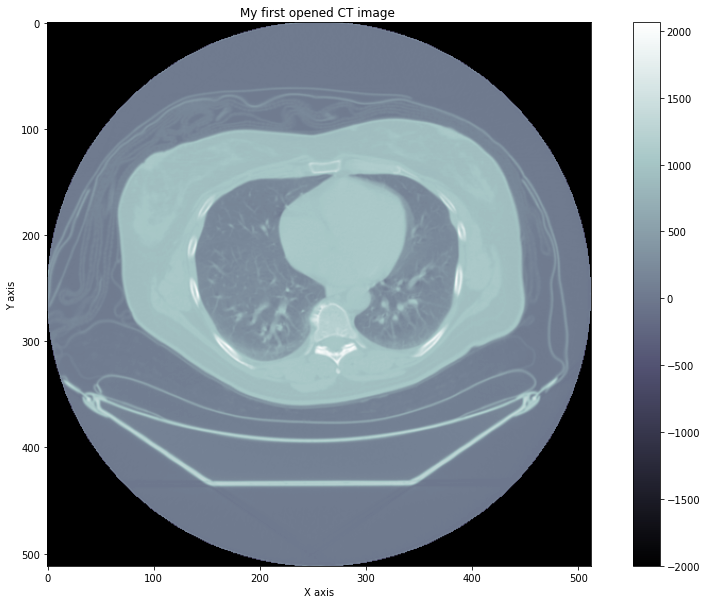

In [22]:
plt.figure(figsize=(15,10))
plt.imshow(my_dcm_file.pixel_array, cmap=plt.cm.bone)
plt.colorbar()
plt.title("My first opened CT image ")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

Be careful on the axis dimensions

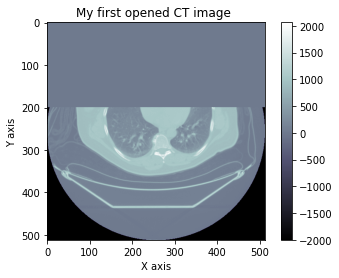

In [23]:
temp = my_dcm_file.pixel_array.copy()
temp[:200] = 18
plt.imshow(temp, cmap=plt.cm.bone)
plt.colorbar()
plt.title("My first opened CT image ")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [24]:
class CT_volume():

    """
    DICOM CT dataset class.

    Takes as input the folder where dicom images of a patient are stored and creates a volume information.

    """

    def __init__(self, patient_folder):
        """Constructor."""
        self.ct_folder = patient_folder
        self._gather_data()

    def _get_file_list(self):
        file_list = os.listdir(self.ct_folder)
        return file_list

    def _gather_data(self):

        slice_ordering = []
        for ct_filename in self._get_file_list():
          ct_filepath = os.path.join(self.ct_folder, ct_filename)
          
          if ct_filepath[-4:]==".dcm":
            ct_file = pydicom.read_file(ct_filepath, force=True)
            if ct_file.SOPClassUID.name == "CT Image Storage": # dcm files can contains other things than CT images.
                slice_ordering.append((ct_filename, ct_file.ImagePositionPatient[2], ct_file.SOPInstanceUID))
          else:
            continue


        slice_ordering.sort(key=lambda x: x[1])
        self.files = [x[0] for x in slice_ordering]
        self.uids = [x[2] for x in slice_ordering]

        self.sample_image = pydicom.read_file(os.path.join(self.ct_folder,
                                      slice_ordering[0][0]), force=True)
        
        first_z = float(slice_ordering[0][1])
        slice_thickness = slice_ordering[1][1] - first_z

        # With the volume corner coordinates and the spacing, you know the position of every single voxel of the volume.
        self.volume_position = [float(self.sample_image.ImagePositionPatient[0]),
                                float(self.sample_image.ImagePositionPatient[1]),
                                first_z]

        self.volume_spacing = [float(self.sample_image.PixelSpacing[0]),
                              float(self.sample_image.PixelSpacing[1]),
                              slice_thickness]

        self.volume_shape = [self.sample_image.Columns,
                            self.sample_image.Rows,
                            len(slice_ordering)]

        self.slice_coordinates = [round(float(z[1]), 4) for z in slice_ordering]

    def get_patient_volume(self):
        """Builds a volume from the CT images."""
        ct_grid = np.zeros((self.volume_shape[2], 
                            self.volume_shape[1], 
                            self.volume_shape[0]) 
        , dtype=np.int16) # Data Type is really important here. How do you want to represent your data.

        for slice_num in range(self.volume_shape[2]):
            ctfile_path = os.path.join(self.ct_folder, self.files[slice_num])
            ct_dicom = pydicom.read_file(ctfile_path, force=True)
            ct_grid[slice_num] = ct_dicom.pixel_array


        return ct_grid


In [25]:
ct_folder = os.path.dirname(list_dcm_path[0])
print(" Creating CT object from {} ".format(ct_folder))
my_ct_obj = CT_volume(ct_folder)
print("My CT volume is of size : ", my_ct_obj.volume_shape)

 Creating CT object from /content/Intro_to_image_processing 
My CT volume is of size :  [512, 512, 35]


In [26]:
my_ct_volume = my_ct_obj.get_patient_volume()

Usually you can find what value is going to be reached by rescaling you pixel values with the slope and intercept byt the tag 0028,1054 which is "rescale Type". If this tag is not specified, then you will get Housnfield Unit.

In [27]:
rescale_slope = my_ct_obj.sample_image.RescaleSlope
rescale_intercept = my_ct_obj.sample_image.RescaleIntercept

In [30]:
scale_ct_volume = my_ct_volume * rescale_slope + rescale_intercept
print("Base shape : " , scale_ct_volume.shape)
cropped_ct_vol = scale_ct_volume[5:30,50:450,100:350 ]
print("Cropped shape : " , cropped_ct_vol.shape)

Base shape :  (35, 512, 512)
Cropped shape :  (25, 400, 250)


I want to print my volume somehow to make sure my images are well placed in my volume. We can use [Plotly](https://plotly.com/python/) or [matplotlib](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) . To print a dense volume, they need to add some transparency. 
Also, this tools are greedy in terms of computations, so we want to lower the size of our volume as much as possible to use them. [Zoom methog from scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.zoom.html) is a very simple waay to resample your array with spline interpolation. 
VTK .

In [31]:
from scipy.ndimage import zoom
new_array = zoom(cropped_ct_vol, (0.5, 0.5, 0.5))
print("Resampled array for plotting has shape {} ". format(new_array.shape))

Resampled array for plotting has shape (12, 200, 125) 


In [33]:
import plotly.graph_objects as go

X, Y, Z = np.mgrid[0:new_array.shape[0]:12j,
                   0:new_array.shape[1]:200j,
                   0:new_array.shape[2]:125j
                   ]

fig = go.Figure(data=go.Volume(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value= new_array.flatten(),
    isomin=np.ndarray.min(new_array),
    isomax=np.ndarray.max(new_array),
    cmin=np.ndarray.min(new_array),
    cmax=np.ndarray.max(new_array),
    opacity=0.1,  
    surface_count=30,
    ))
fig.show(renderer="colab")

Output hidden; open in https://colab.research.google.com to view.

Plotly also has a really good [example](https://plotly.com/python/visualizing-mri-volume-slices/) of plot to display images one by one.

##Writing a DICOM file

In [34]:
from pydicom import Dataset, DataElement

elem = DataElement(0x00100010, 'PN', 'CITIZEN^Joan')
ds = Dataset()
ds.add(elem)

ds.save_as('new.dcm') #, write_like_original=False

AttributeError: ignored

It is rasing an exception because there are some mandatory attributes to write a DICOM.

In [35]:
ds.is_little_endian = True
ds.is_implicit_VR = True
ds.save_as('new.dcm')
print(glob.glob("/content/Intro_to_image_processing/*new*"))

['/content/Intro_to_image_processing/new.dcm']


In [37]:
dicm = pydicom.dcmread(list_dcm_path[0])
new_ds =  Dataset()
for elem in dicm :
  if elem.name == 'Pixel Data' :
    #TODO crop an image array and create new data element
    data_element = pydicom.DataElement(tag=elem.tag, VR='OW', value=dicm.pixel_array[250:300,250:300].tobytes('C'))
    new_ds.add(data_element)
  else : 
    new_ds.add(elem)

new_ds.Rows, new_ds.Columns = dicm.pixel_array[250:300,250:300].shape
new_ds.is_little_endian = True
new_ds.is_implicit_VR = False
new_ds.file_meta = pydicom.dataset.FileMetaDataset()
new_ds.file_meta.TransferSyntaxUID = '1.2.840.10008.1.2.1'
new_ds.save_as("new_dcm_file.dcm")
#write_like_original=False


In [38]:
check_dcm = pydicom.dcmread(os.path.join(os.path.dirname(list_dcm_path[0]), "new_dcm_file.dcm"), force=True)
check_dcm.pixel_array

array([[-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000, -2000,
        -2000, -2000, -2000, -2000, -2000, -2000],
       [-2000, -2000, -2

In [39]:
print(np.all(check_dcm.pixel_array==dicm.pixel_array[:15,:15]))

True


/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/numpy_handler.py:250: UserWarning:

The length of the pixel data in the dataset (524288 bytes) indicates it contains excess padding. 523838 bytes will be removed from the end of the data



##RTSTRUCT File

Here I use basic python library to draw forms from points but this library may not be the most useful one. Please have a look at [ITK](https://itkpythonpackage.readthedocs.io/en/latest/Quick_start_guide.html#usage), [VTK](https://vtk.org/doc/nightly/html/md__builds_gitlab_kitware_sciviz_ci_Documentation_Doxygen_PythonWrappers.html) 


In [3]:
# struct_dcm = pydicom.dcmread('/content/Intro_to_image_processing/RTSTRUCT.dcm')
# struct_dcm

In [41]:
struct_dcm.dir()

['AccessionNumber',
 'ApprovalStatus',
 'BodyPartExamined',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientBirthDate',
 'PatientID',
 'PatientIdentityRemoved',
 'PatientName',
 'PatientSex',
 'ROIContourSequence',
 'RTROIObservationsSequence',
 'ReferencedFrameOfReferenceSequence',
 'ReferringPhysicianName',
 'SOPClassUID',
 'SOPInstanceUID',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SoftwareVersions',
 'SpecificCharacterSet',
 'StructureSetDate',
 'StructureSetLabel',
 'StructureSetName',
 'StructureSetROISequence',
 'StructureSetTime',
 'StudyDate',
 'StudyDescription',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime']

In [42]:
for struc in struct_dcm.StructureSetROISequence :
  print(struc)

(3006, 0022) ROI Number                          IS: '11'
(3006, 0024) Referenced Frame of Reference UID   UI: 1.3.6.1.4.1.14519.5.2.1.6834.5010.418656079480636372817978969413
(3006, 0026) ROI Name                            LO: 'Trachea_c90'
(3006, 002c) ROI Volume                          DS: '0.0'
(3006, 0036) ROI Generation Algorithm            CS: 'SEMIAUTOMATIC'
(3006, 0022) ROI Number                          IS: '32'
(3006, 0024) Referenced Frame of Reference UID   UI: 1.3.6.1.4.1.14519.5.2.1.6834.5010.418656079480636372817978969413
(3006, 0026) ROI Name                            LO: 'RLung_c90'
(3006, 002c) ROI Volume                          DS: '0.0'
(3006, 0036) ROI Generation Algorithm            CS: 'SEMIAUTOMATIC'
(3006, 0022) ROI Number                          IS: '41'
(3006, 0024) Referenced Frame of Reference UID   UI: 1.3.6.1.4.1.14519.5.2.1.6834.5010.418656079480636372817978969413
(3006, 0026) ROI Name                            LO: 'LN_c90'
(3006, 002c) ROI Volum

In [43]:
for struc in struct_dcm.StructureSetROISequence :
  print(struc.ROIName)

Trachea_c90
RLung_c90
LN_c90
LLung_c90
MarkerA_c90
MarkerB_c90
MarkerC_c90
Tumor_c90
Cord_c90
Esophagus_c90
Heart_c90
Carina_c90


In [44]:
for contour in struct_dcm.ROIContourSequence:
  print(contour)
  break

(3006, 002a) ROI Display Color                   IS: [0, 160, 160]
(3006, 0040)  Contour Sequence  75 item(s) ---- 
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.14519.5.2.1.6834.5010.197922116404450833933543688932
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: '26'
   (3006, 0050) Contour Data                        DS: Array of 78 elements
   ---------
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.3.6.1.4.1.14519.5.2.1.6834.5010.722880947766399877042342554646
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points   

In [45]:
for contour_seq in struct_dcm.ROIContourSequence: #One sequence for each ROI. Can map the ROI looking at the ROI Name
  for contour in contour_seq.ContourSequence :#One contour array for each contour made in the form of [x1, y1, z1, x2, y2, z2, ..., xn, yn, zn]
    print(contour.ContourData)
    break
  break

[-4.08, -30.77, 160.5, -3.1, -31.75, 160.5, -3.1, -32.72, 160.5, -3.1, -33.7, 160.5, -4.08, -34.68, 160.5, -5.05, -35.65, 160.5, -6.03, -36.63, 160.5, -7.01, -37.61, 160.5, -7.98, -37.61, 160.5, -8.96, -37.61, 160.5, -9.94, -36.63, 160.5, -10.91, -35.65, 160.5, -11.89, -34.68, 160.5, -11.89, -33.7, 160.5, -11.89, -32.72, 160.5, -11.89, -31.75, 160.5, -11.89, -30.77, 160.5, -10.91, -29.79, 160.5, -10.91, -28.82, 160.5, -9.94, -27.84, 160.5, -8.96, -27.84, 160.5, -7.98, -27.84, 160.5, -7.01, -27.84, 160.5, -6.03, -27.84, 160.5, -5.05, -28.82, 160.5, -5.05, -29.79, 160.5]


Let's use a very simple library to draw shapes : matplotlib and the [Path](https://matplotlib.org/stable/api/path_api.html) class.

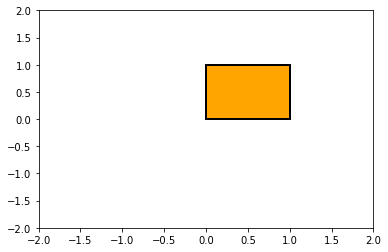

In [67]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches


verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]
path = Path(verts,codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [46]:
from matplotlib.path import Path
class Structure(object):
    """Wrapper for a structure inside a DICOM file."""

    def __init__(self, attrs):
        """
        Constructor.
        Needs the DICOM file path and either the ROI name or ROI index or both
        :param roi_num: Sequence index for the structure inside the DICOM file.
        :param roi_name: Name of the structure.
        :param struct_path: Full path to DICOM RT Structure file.
        """
        self.struct_path = attrs["file_path"]
        # Can provide either the ROI num or the ROI name
        self.roi_num = attrs["roi_num"] if "roi_num" in attrs else self.get_num(attrs["roi_name"])
        self.roi_name = attrs["roi_name"] if "roi_name" in attrs else self.get_name(attrs["roi_num"])
        self.roi_index = self.get_index()


    def get_name(self, roi_num):
        struct_path = self.struct_path
        struct_file = pydicom.read_file(struct_path, force=True)
        for roi in struct_file.StructureSetROISequence:
            if roi.ROINumber == roi_num:
                return roi.ROIName
        return None

    def get_num(self, roi_name):
        struct_path = self.struct_path
        struct_file = pydicom.read_file(struct_path, force=True)

        for roi in struct_file.StructureSetROISequence:
            if roi.ROIName == roi_name:
                return roi.ROINumber

    def get_index(self):
        struct_path = self.struct_path
        struct_file = pydicom.read_file(struct_path, force=True)
        for index, roi in enumerate(struct_file.StructureSetROISequence):
            if roi.ROIName == self.roi_name: # no need for decoding anymore we already have string python 2 => python 3
                return index

    def get_roi(self):
        struct_path = self.struct_path
        struct_file = pydicom.read_file(struct_path, force=True)
        return struct_file.ROIContourSequence[self.roi_index]



    def get_mask_slices(self, patient_shape, patient_spacing , patient_origin):
        """
        Return contour masks for one specific patient.

        """
        roi_dict = {}
        roi = self.get_roi()
        if "ContourSequence" in roi:
            for contour in roi.ContourSequence:
                if "ContourData" in contour:
                    z_value = contour.ContourData[2]
                    ctrs = np.array(contour.ContourData).tolist()
                    contour_data = Path([ctrs[i:i+2] for i in range(0,len(ctrs),3)]) 
                    
                    # Using float as dict key is okay here because they'll just be iterated over.
                    if z_value not in roi_dict:
                        roi_dict[z_value] = []
                    roi_dict[z_value].append(contour_data)

        slice_dict = {}
        z_positions = sorted(roi_dict.keys())
        ar_z_positions = np.array(z_positions)
        structure_spacing = ar_z_positions[1] - ar_z_positions[0]

        assert structure_spacing == patient_spacing[2]
        grid_mask = np.zeros((patient_shape[::-1]), dtype=bool)

        for vox in range(patient_shape[2]):
            slice_dict[vox] = []
            z_pos = patient_spacing[2]*vox + patient_origin[2]
            idx = np.argmin(abs(ar_z_positions-z_pos))
            
            slice_dict[vox].append(roi_dict[z_positions[idx]])

        x_positions = np.arange(patient_shape[0]) * patient_spacing[0] + patient_origin[0]
        y_positions = np.arange(patient_shape[1]) * patient_spacing[1] + patient_origin[1]

        position_grid = np.meshgrid(x_positions, y_positions)
        position_flat = zip(position_grid[0].flatten(), position_grid[1].flatten())
        position_list = []
        for tpl in tuple(position_flat):
          position_list.append(list(tpl))

        

        mask = np.zeros(patient_shape[1] * patient_shape[0], dtype=bool)

        for slice_num, path_list in slice_dict.items():
            local_mask = np.zeros(patient_shape[1] * patient_shape[0], dtype=bool)
            for path in path_list : 
              for contour in path:
                if contour is not None:
                  contour_mask = contour.contains_points(position_list)
                  local_mask = np.logical_xor(local_mask, contour_mask)
              mask = np.logical_or(mask, local_mask)

            grid_mask[slice_num] = mask.reshape((patient_shape[1], patient_shape[0]))            

        return grid_mask


In [47]:
struct_attr = {'file_path' : '/content/Intro_to_image_processing/RTSTRUCT.dcm',
               'roi_name' : 'RLung_c90'}
struct_obj = Structure(struct_attr)

In [61]:
from itertools import zip_longest
minz = 99999.
maxz = -10000.

miny = 99999.
maxy = -10000.

minx = 99999.
maxx = -10000.

list_of_zs = []

for contour_seq in struct_dcm.ROIContourSequence: #One sequence for each ROI. Can map the ROI looking at the ROI Name
  for contour in contour_seq.ContourSequence :#One contour array for each contour made in the form of [x1, y1, z1, x2, y2, z2, ..., xn, yn, zn]
    ctrs = np.array(contour.ContourData).tolist()
    list_xyz = [ctrs[i:i+3] for i in range(0,len(ctrs),3)]#zip(*([iter(ctrs)] * 3))
    
    zs = [pos[2] for pos in list_xyz]
    xs = [pos[0] for pos in list_xyz]
    ys = [pos[1] for pos in list_xyz]

    z = np.min(zs)
    y = np.min(ys)
    x = np.min(xs)

    list_of_zs.append(z)
    if z < minz:
      minz = z
    if y < miny:
      miny = y
    if x < minx:
      minx = x

    if z > maxz:
      maxz = z
    if y > maxy:
      maxy = y
    if x > maxx:
      maxx = x
print("Z axis contours go from {} tp {} ".format(minz, maxz))
print("Y axis contours go from {} tp {} ".format(miny, maxy))
print("X axis contours go from {} tp {} ".format(minx, maxx))


Z axis contours go from -262.5 tp 160.5 
Y axis contours go from -119.61 tp 66.59 
X axis contours go from -155.16 tp 114.86 


In [54]:
z_spacing = abs(list_of_zs[1]-list_of_zs[0])
z_spacing

3.0

In [55]:
my_array_contours = struct_obj.get_mask_slices(patient_shape = [350,350,250], patient_spacing= [2.,2.,z_spacing], patient_origin=[-300.,-300.,-300.])
my_array_contours.shape


()
[[-300.0, -300.0], [-298.0, -300.0], [-296.0, -300.0], [-294.0, -300.0], [-292.0, -300.0]]


(250, 350, 350)

In [56]:
np.where(my_array_contours==True)

(array([  0,   0,   0, ..., 249, 249, 249]),
 array([100, 101, 101, ..., 189, 189, 189]),
 array([ 89,  88,  89, ..., 114, 115, 116]))

In [57]:
my_array_contours[249,91,103]

True

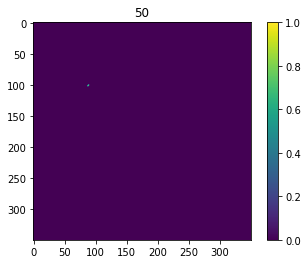

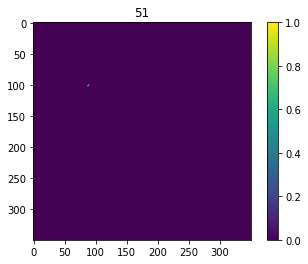

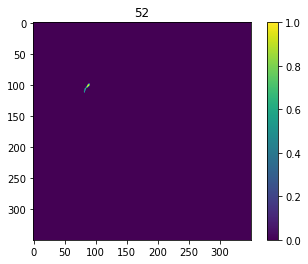

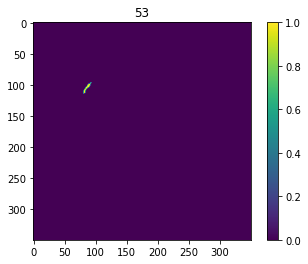

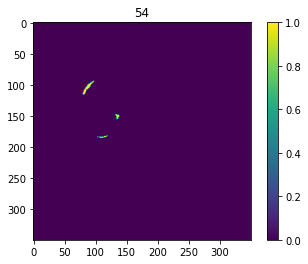

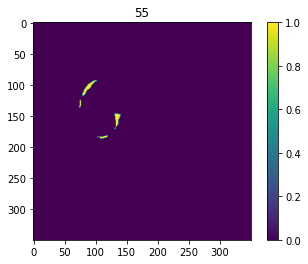

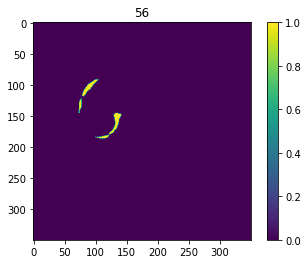

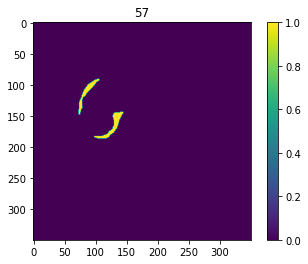

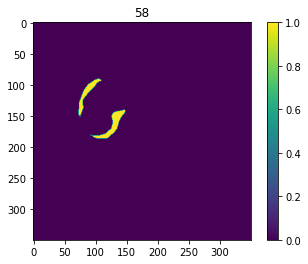

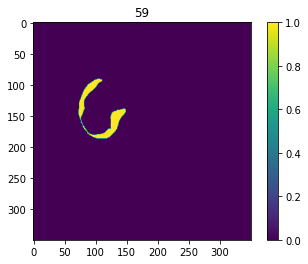

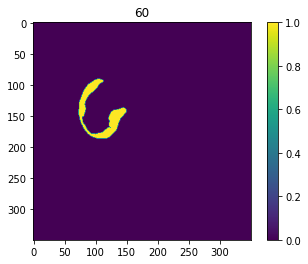

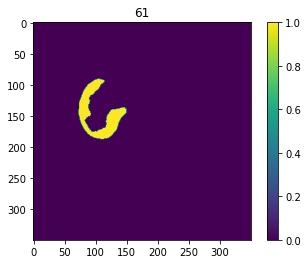

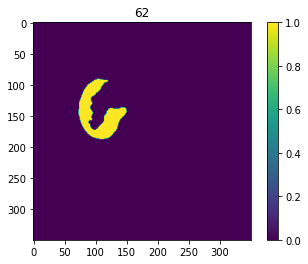

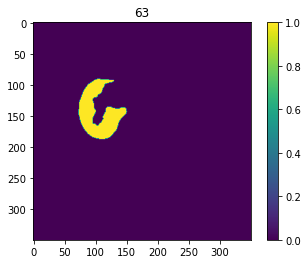

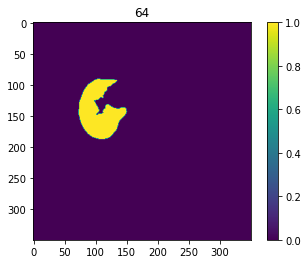

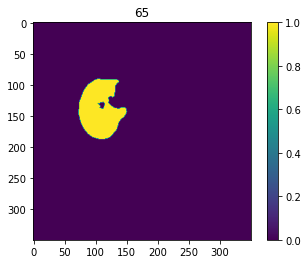

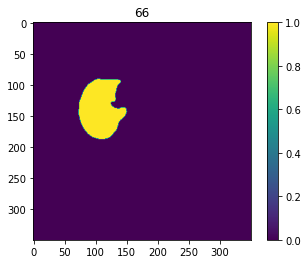

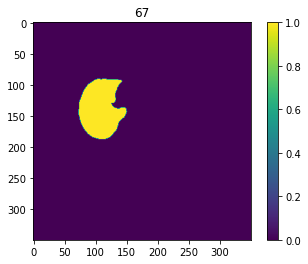

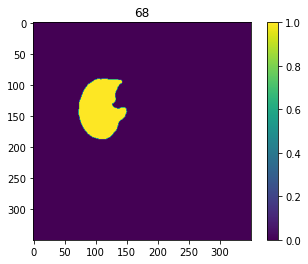

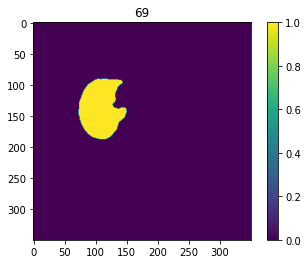

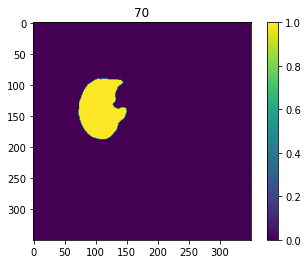

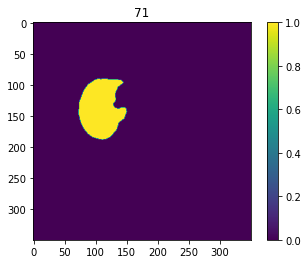

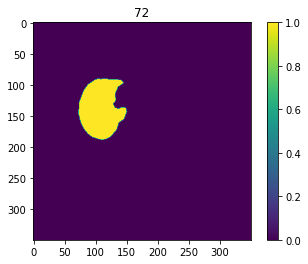

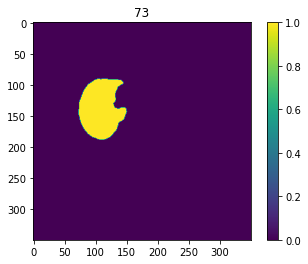

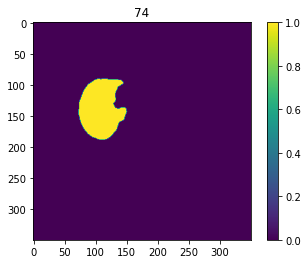

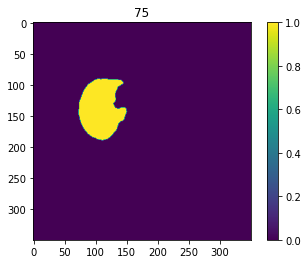

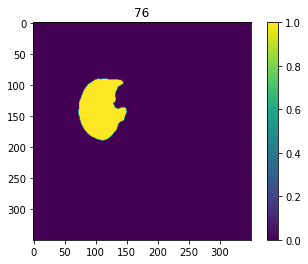

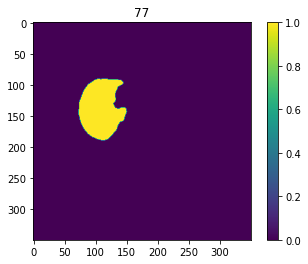

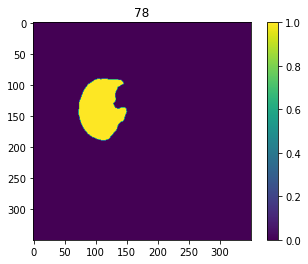

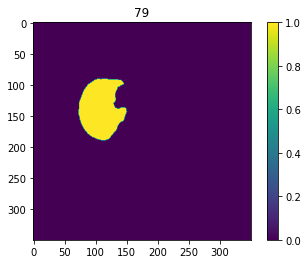

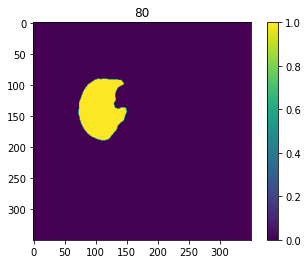

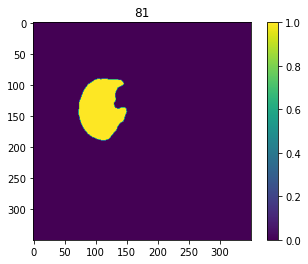

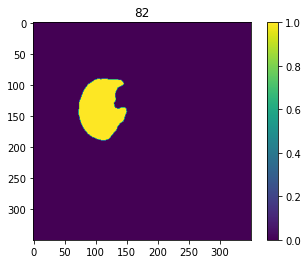

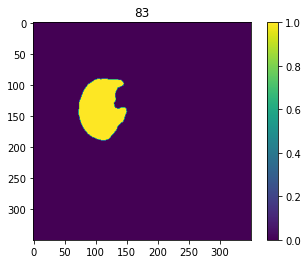

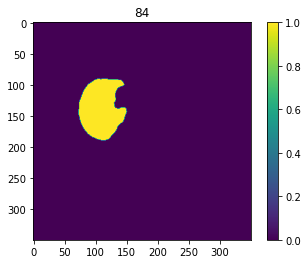

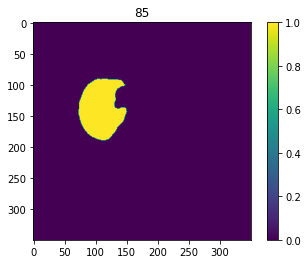

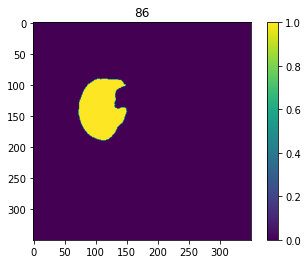

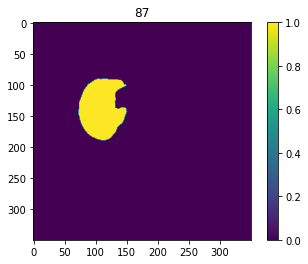

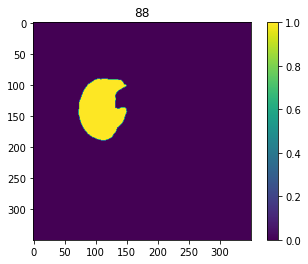

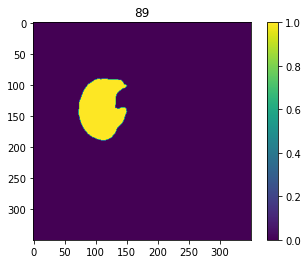

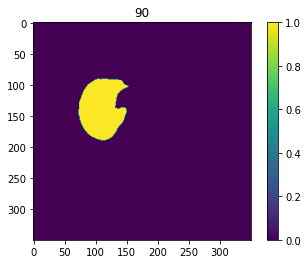

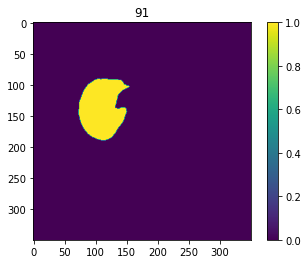

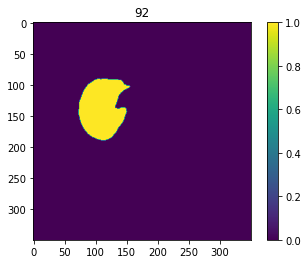

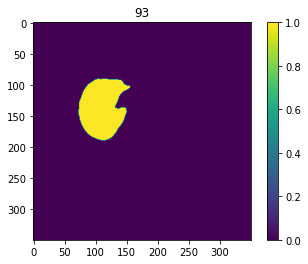

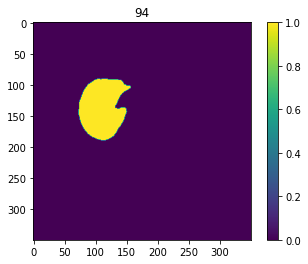

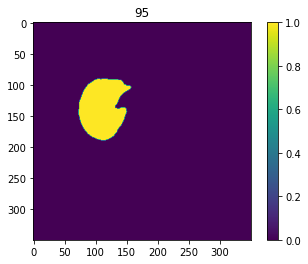

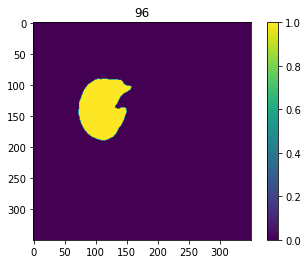

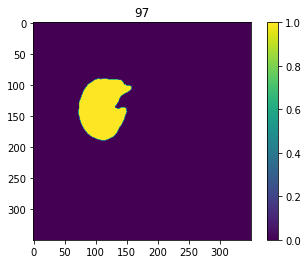

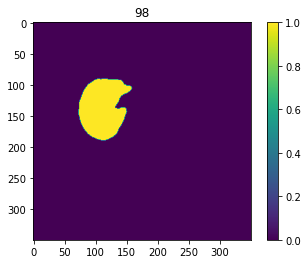

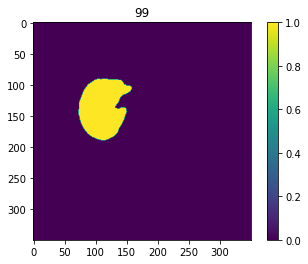

In [59]:
for i in range(50,100):
  plt.title(i)
  plt.imshow(my_array_contours[i])
  plt.colorbar()
  plt.show()

## Last but not *least*

There are many ways shown in [this tutorial](https://pydicom.github.io/pydicom/stable/auto_examples/metadata_processing/plot_anonymize.html#sphx-glr-auto-examples-metadata-processing-plot-anonymize-py) to anonymise your data. But you should be careful regarding the rules of your data owner/ethics board when considering all the tags you need to remove from the DICOM images. Some hosptials for instance not only ask to remove patient ID and name but also the sex, age etc.

You can also make certain elements from your DICOM file [private](https://pydicom.github.io/pydicom/stable/old/private_data_elements.html) 

or [compress](https://pydicom.github.io/pydicom/stable/old/image_data_handlers.html) the image stored in your DICOM.

Link with next workshop : You can convert DICOM to [Nifti](https://brainder.org/2012/09/23/the-nifti-file-format/) format to be able to use [torchIO](https://torchio.readthedocs.io/) .

# Histopathological Images